<img src="images/ublogo.png"/>

### CSE610 - Bayesian Non-parametric Machine Learning

  - Lecture Notes
  - Instructor - Varun Chandola
  - Term - Fall 2020

### Objective
The objective of this notebook is to provide detailed discussions about Bayesian linear regression.

<div class="alert alert-info">

**Note:** This material is based on Chapter 2 of the GPML book.

</div>

First let us get the notation right.

- $\mathcal{D} = \{({\bf x}_i,y_i)\vert i = 1\ldots N\}$ is the training data set
  * ${\bf x}_i$ is the $i^{th}$ input vector (covariates) of dimension $D$
  * $y_i$ is the scalar output or target
- $X$ is the $D \times N$ design or input matrix, where the $i^{th}$ column is ${\bf x}_i$
> In many other places (including my own CSE474/574 course), $X$ is treated as a $N \times D$ matrix. While that is a more widely used notation, the GP book uses the $D \times N$ matrix notation and we will stick with that.
- $\mathcal{D}$ can be written as $\mathcal{D} = ({\bf X},{\bf y})$
  * ${\bf y}$ is the $N$ length vector containing the training targets, i.e., $y_i$s

### Standard Linear Regression
Let us consider the standard linear regression model with Gaussian noise:
$$
f({\bf x}) = {\bf w}^\top{\bf x}\quad y = f({\bf x}) + \epsilon
$$
> While you might be familiar with the more direct expression: $y = {\bf w}^\top{\bf x} + \epsilon$, the above expression allows for a _latent function_ perspective, which will be used when we will talk about Gaussian Process Regression.

In other words, we assume that a _latent function_ connects the target to the inputs. The additive noise is assumed to follow an i.i.d Gaussian distribution:
$$
\epsilon \sim \mathcal{N}(0,\sigma_n^2)
$$

The *likelihood* of the training data set (because of the independence assumption) can be written as:
$$
p({\bf y}\vert X,{\bf w}) = \mathcal{N}(X^\top{\bf w},\sigma^2_nI)
$$
> Why? Check derivation in class.

#### Adding a prior
We need to specify priors on the parameters. Here we have two parameters, ${\bf w}$ and $\sigma_n^2$. Here we will ignore the latter, and only focus on ${\bf w}$. We put a zero mean Gaussian prior with covariance matrix $\Sigma_p$ on the ${\bf w}$:
$$
{\bf w} \sim \mathcal{N}({\bf 0},\Sigma_p)
$$

How do we get the posterior distribution for ${\bf w}$, i.e., $p({\bf w}\vert X,{\bf y})$?

$$
\text{posterior} = \frac{\text{likelihood}\times\text{prior}}{\text{marginal likelihood}}
$$


$$
p({\bf w}\vert X,{\bf y}) = \frac{p({\bf y}\vert X,{\bf w})p({\bf w}\vert X)}{p({\bf y}\vert X)} \equiv \frac{p({\bf y}\vert X,{\bf w})p({\bf w})}{p({\bf y}\vert X)}
$$

We already know what the two terms in the numerator are. What about the marginal likelihood?

$$
p({\bf y}\vert X) = \int{p({\bf y}\vert X,{\bf w})p({\bf w})d{\bf w}}
$$

You can solve the above integral. But you don't really have to, all we need to know that the marginal likelihood is independent of the weight vector. 

<div class="alert alert-info">

**Note:** We will make use of the marginal likelihood of the data, very soon.

</div>

To obtain the posterior probability distribution, from (6) above, we only need to solve the numerator, since the denominator is independent of ${\bf w}$. In fact, we are only concerned by the term within the exponent, since anything outside is independent of ${\bf w}$, and hence, can be treated as a constant multiple which can be adjusted for later.
$$
p({\bf w}\vert X,{\bf y}) \propto \exp\left(-\frac{1}{2\sigma^2_n}({\bf y}-X^\top{\bf w})^\top({\bf y}-X^\top{\bf w})\right)\exp\left(-\frac{1}{2}{\bf w}^\top\Sigma^{-1}{\bf w}\right)
$$
After some mathematical jugglery, it the posterior turns out to be a Gaussian as well:
$$
p({\bf w}\vert X,{\bf y}) \sim \mathcal{N}(\bar{\bf w} = \frac{1}{\sigma^2_n}A^{-1}X{\bf y},A^{-1})
$$
where $A = \sigma_n^{-2}XX^\top + \Sigma^{-1}_p$.
> This is not by accident. The conjugate prior for Gaussian likelihood is Gaussian, and hence the posterior will also be a Gaussian.

#### Getting predictions with Bayesian regression
Of course, we can take the MAP estimate of the posterior, which is also the expected value for a Gaussian distribution, as the estimated weight vector, and use it to get prediction for a new input:
$$
y_* = {\bf w}_{MAP}^\top{\bf x}_*
$$
This is equivalent to *ridge* regression.

However, in Bayesian formulation, we do not take a single estimate of ${\bf w}$. We average over all possible parameter values, weighted by their posterior probability. 

> This is a key different between Bayesian and non-Bayesian methods.

So, the predictive distribution for the latent function, $f_*$, will be:
\begin{eqnarray}
p(f_*\vert {\bf x}_*,X,{\bf y}) & = & \int p(f_*\vert {\bf x}_*,{\bf w})p({\bf w}\vert X,{\bf y})d{\bf w}\\
                                & = & \mathcal{N}(\frac{1}{\sigma_n^2}{\bf x}_*^\top A^{-1}X{\bf y},{\bf x}_*^\top A^{-1}{\bf x}_*)
\end{eqnarray}

So, even the predictive distribution is Gaussian (again due to the Gaussian-Gaussian conjugate property). We get a predictive mean and variance (uncertainty).

Now let us look at some results based on this.

In [69]:
%run Utilities.ipynb

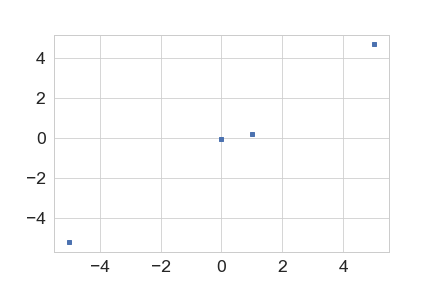

In [112]:
Xraw = np.array([[-5,0,1,5]])
X = np.vstack([np.ones((1,Xraw.shape[1])),Xraw])
y = np.array([[-5.2],[-0.04],[0.2],[4.7]])
plt.plot(Xraw.T,y,'s')

In [113]:
# assume a Gaussian prior on w
prior_mean = np.zeros((2,))
prior_cov = np.eye(2)
# fix the sigma for the regression
sigmansq = 1

Text(-1.0, -1.0, 'Prior mean')

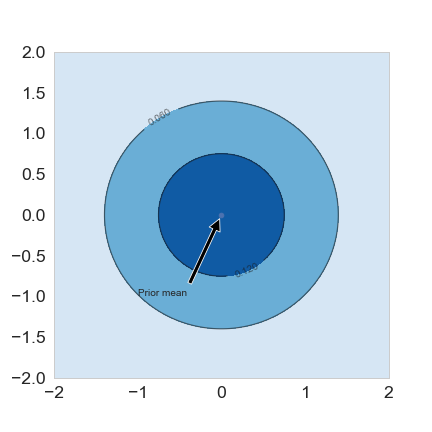

In [114]:
# plot the prior distribution
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

plot_contours(ax,prior_mean,prior_cov,limits=(-2,2),levels=2,cm='Blues')
ax.scatter(prior_mean[0],prior_mean[1])
ax.annotate('Prior mean', xy=(prior_mean[0],prior_mean[1]), xytext=(prior_mean[0]-1,prior_mean[1]-1),
            arrowprops=dict(facecolor='black', shrink=0.05))

In [116]:
# find the MLE estimate
ols = LinearRegression(fit_intercept=False)
ols.fit(X.T, y)
print(ols.coef_[0][0],ols.coef_[0][1])

-0.330246305418719 0.9809852216748767


Text(-1.330246305418719, 1.9809852216748767, 'MLE Estimate')

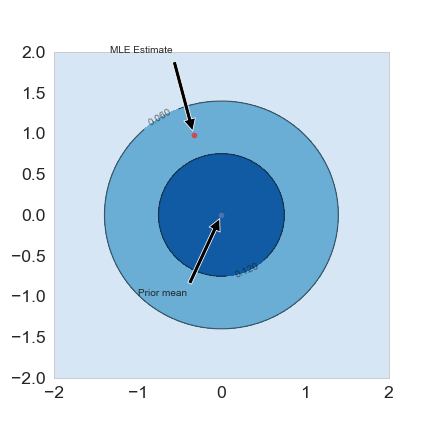

In [117]:
# plot the prior distribution + MLE
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plot_contours(ax,prior_mean,prior_cov,limits=(-2,2),levels=2,cm='Blues')
ax.scatter(prior_mean[0],prior_mean[1])
ax.annotate('Prior mean', xy=(prior_mean[0],prior_mean[1]), xytext=(prior_mean[0]-1,prior_mean[1]-1),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.scatter(ols.coef_[0][0],ols.coef_[0][1],c='r',s=24)
ax.annotate('MLE Estimate', xy=(ols.coef_[0][0],ols.coef_[0][1]), 
            xytext=(ols.coef_[0][0]-1,ols.coef_[0][1]+1),
            arrowprops=dict(facecolor='black', shrink=0.05))

In [118]:
w_bayes,Sigma_bayes = bayesPosterior(X,y,sigmansq,prior_cov)

Text(0.7398455598455599, -0.039227799227799176, 'Posterior Mean')

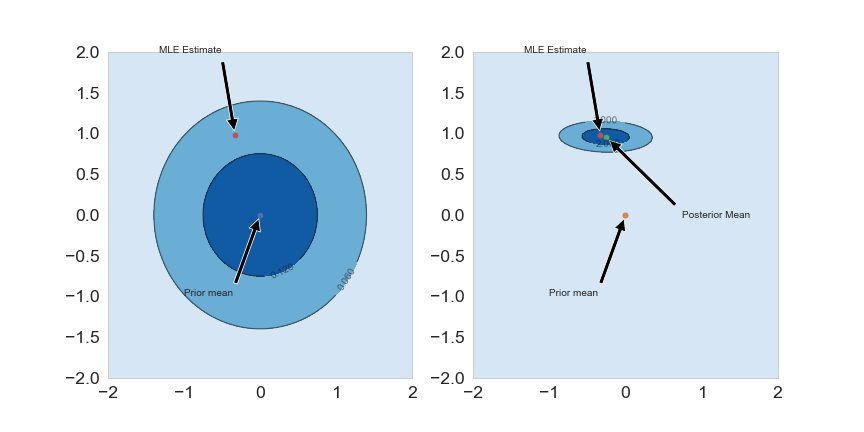

In [119]:
# plot the prior distribution + MLE + posterior
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)

plot_contours(ax,prior_mean,prior_cov,limits=(-2,2),levels=2,cm='Blues')
ax.scatter(prior_mean[0],prior_mean[1])
ax.annotate('Prior mean', xy=(prior_mean[0],prior_mean[1]), xytext=(prior_mean[0]-1,prior_mean[1]-1),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.scatter(ols.coef_[0][0],ols.coef_[0][1],c='r',s=24)
ax.annotate('MLE Estimate', xy=(ols.coef_[0][0],ols.coef_[0][1]), 
            xytext=(ols.coef_[0][0]-1,ols.coef_[0][1]+1),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax = plt.subplot(122)
plot_contours(ax,w_bayes.flatten(),Sigma_bayes,limits=(-2,2),levels=2,cm='Blues')

ax.scatter(prior_mean[0],prior_mean[1])
ax.scatter(prior_mean[0],prior_mean[1])
ax.annotate('Prior mean', xy=(prior_mean[0],prior_mean[1]), xytext=(prior_mean[0]-1,prior_mean[1]-1),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.scatter(ols.coef_[0][0],ols.coef_[0][1],c='r',s=24)
ax.annotate('MLE Estimate', xy=(ols.coef_[0][0],ols.coef_[0][1]), 
            xytext=(ols.coef_[0][0]-1,ols.coef_[0][1]+1),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.scatter(w_bayes[0,0],w_bayes[1,0],c='g',s=24)
ax.annotate('Posterior Mean', xy=(w_bayes[0,0],w_bayes[1,0]), 
            xytext=(w_bayes[0,0]+1,w_bayes[1,0]-1),
            arrowprops=dict(facecolor='black', shrink=0.05))



Note how the posterior distribution has "shrunk" after observing the data.

In [120]:
X_stars = np.linspace(-6,6,10)
f_stars = []
sigma_stars = []
for x_star in X_stars:
    x_star = np.array([[1],[x_star]])
    f_star = (1/sigmansq)*np.dot(x_star.T,np.dot(Sigma_bayes,np.dot(X,y)))
    f_stars.append(f_star[0])
    sigma_star = np.dot(x_star.T,np.dot(Sigma_bayes,x_star))
    sigma_stars.append(sigma_star[0])
f_stars = np.array(f_stars).flatten()
sigma_stars = np.array(sigma_stars).flatten()

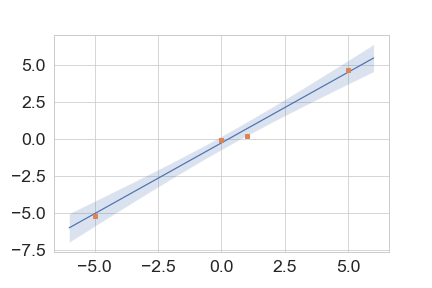

In [122]:
plt.plot(X_stars,f_stars)
plt.fill_between(X_stars,f_stars-np.sqrt(sigma_stars),f_stars+np.sqrt(sigma_stars),alpha=0.2)
plt.plot(Xraw.T,y,'s')